## データ準備

In [1]:
from sklearn import datasets, model_selection

features, labels = datasets.load_boston(return_X_y =True)
train_features, test_features, train_labels, test_labels = model_selection.train_test_split(features, labels, test_size=0.2)
train_features, valid_features, train_labels, valid_labels = model_selection.train_test_split(train_features, train_labels, test_size=0.1)

print(train_features.shape)
print(train_labels.shape)
print(valid_features.shape)
print(valid_labels.shape)
print(test_features.shape)
print(test_labels.shape)

(363, 13)
(363,)
(41, 13)
(41,)
(102, 13)
(102,)


In [2]:
import lightgbm as lgb

trains = lgb.Dataset(train_features, train_labels)
valids = lgb.Dataset(valid_features, valid_labels)
tests = lgb.Dataset(test_features, test_labels)

/usr/local/var/pyenv/versions/3.6.8/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


## ハイパーパラメータ最適化

In [3]:
import optuna.integration.lightgbm as lgb

params = {
    'objective': 'mean_squared_error',
    'metric': 'rmse'
}
best_params, history = {}, []
model = lgb.train(params, trains, valid_sets=valids,
                    verbose_eval=False,
                    num_boost_round=50,
                    early_stopping_rounds=5,
                    best_params=best_params,
                    tuning_history=history)

tune_feature_fraction, val_score: 4.559104: 100%|##########| 7/7 [00:01<00:00,  5.12it/s][I 2020-01-25 22:26:39,426] Finished trial#6 resulted in value: 4.559104141845314. Current best value is 4.559104141845314 with parameters: {'feature_fraction': 1.0}.

tune_num_leaves, val_score: 4.559104: 100%|##########| 20/20 [00:03<00:00,  4.94it/s][I 2020-01-25 22:26:43,380] Finished trial#19 resulted in value: 4.559104141845314. Current best value is 4.559104141845314 with parameters: {'num_leaves': 76}.

tune_bagging_fraction_and_bagging_freq, val_score: 4.559104:  10%|#         | 1/10 [00:00<00:01,  6.81it/s][I 2020-01-25 22:26:43,590] Finished trial#0 resulted in value: 4.57589245926804. Current best value is 4.57589245926804 with parameters: {'bagging_fraction': 0.9705114617689281, 'bagging_freq': 7}.
tune_bagging_fraction_and_bagging_freq, val_score: 4.559104:  20%|##        | 2/10 [00:00<00:01,  7.27it/s][I 2020-01-25 22:26:43,706] Finished trial#1 resulted in value: 5.7438419452214315.

tune_bagging_fraction_and_bagging_freq, val_score: 4.559104:  50%|#####     | 5/10 [00:00<00:00,  6.71it/s][I 2020-01-25 22:26:44,148] Finished trial#4 resulted in value: 4.58243837109526. Current best value is 4.57589245926804 with parameters: {'bagging_fraction': 0.9705114617689281, 'bagging_freq': 7}.
tune_bagging_fraction_and_bagging_freq, val_score: 4.559104:  60%|######    | 6/10 [00:00<00:00,  6.99it/s][I 2020-01-25 22:26:44,284] Finished trial#5 resulted in value: 5.339862903303512. Current best value is 4.57589245926804 with parameters: {'bagging_fraction': 0.9705114617689281, 'bagging_freq': 7}.
tune_bagging_fraction_and_bagging_freq, val_score: 4.559104:  70%|#######   | 7/10 [00:01<00:00,  5.17it/s][I 2020-01-25 22:26:44,620] Finished trial#6 resulted in value: 4.5687936670146945. Current best value is 4.5687936670146945 with parameters: {'bagging_fraction': 0.9580617213829659, 'bagging_freq': 5}.
tune_bagging_fraction_and_bagging_freq, val_score: 4.559104:  80%|########  |

tune_lambda_l1_and_lambda_l2, val_score: 4.532138:  95%|#########5| 19/20 [00:03<00:00,  4.80it/s][I 2020-01-25 22:26:49,860] Finished trial#18 resulted in value: 4.561094886134995. Current best value is 4.532137538000621 with parameters: {'lambda_l1': 0.5180093752159527, 'lambda_l2': 0.018791253111455634}.
tune_lambda_l1_and_lambda_l2, val_score: 4.532138: 100%|##########| 20/20 [00:04<00:00,  4.76it/s][I 2020-01-25 22:26:50,074] Finished trial#19 resulted in value: 4.707147735137094. Current best value is 4.532137538000621 with parameters: {'lambda_l1': 0.5180093752159527, 'lambda_l2': 0.018791253111455634}.

tune_min_child_samples, val_score: 4.147924: 100%|##########| 5/5 [00:01<00:00,  5.21it/s][I 2020-01-25 22:26:51,175] Finished trial#4 resulted in value: 6.557003613865363. Current best value is 4.147923875335919 with parameters: {'min_child_samples': 5}.



In [4]:
best_params

{'lambda_l1': 0.5180093752159527,
 'lambda_l2': 0.018791253111455634,
 'num_leaves': 31,
 'feature_fraction': 1.0,
 'bagging_fraction': 1.0,
 'bagging_freq': 0,
 'min_child_samples': 5}

In [5]:
param_defaults = {
    'lambda_l1': 0.0,
    'lambda_l2': 0.0,
    'num_leaves': 31,
    'feature_fraction':  1.0,
    'bagging_fraction':  1.0,
    'bagging_freq': 0,
    'min_child_samples': 20
}

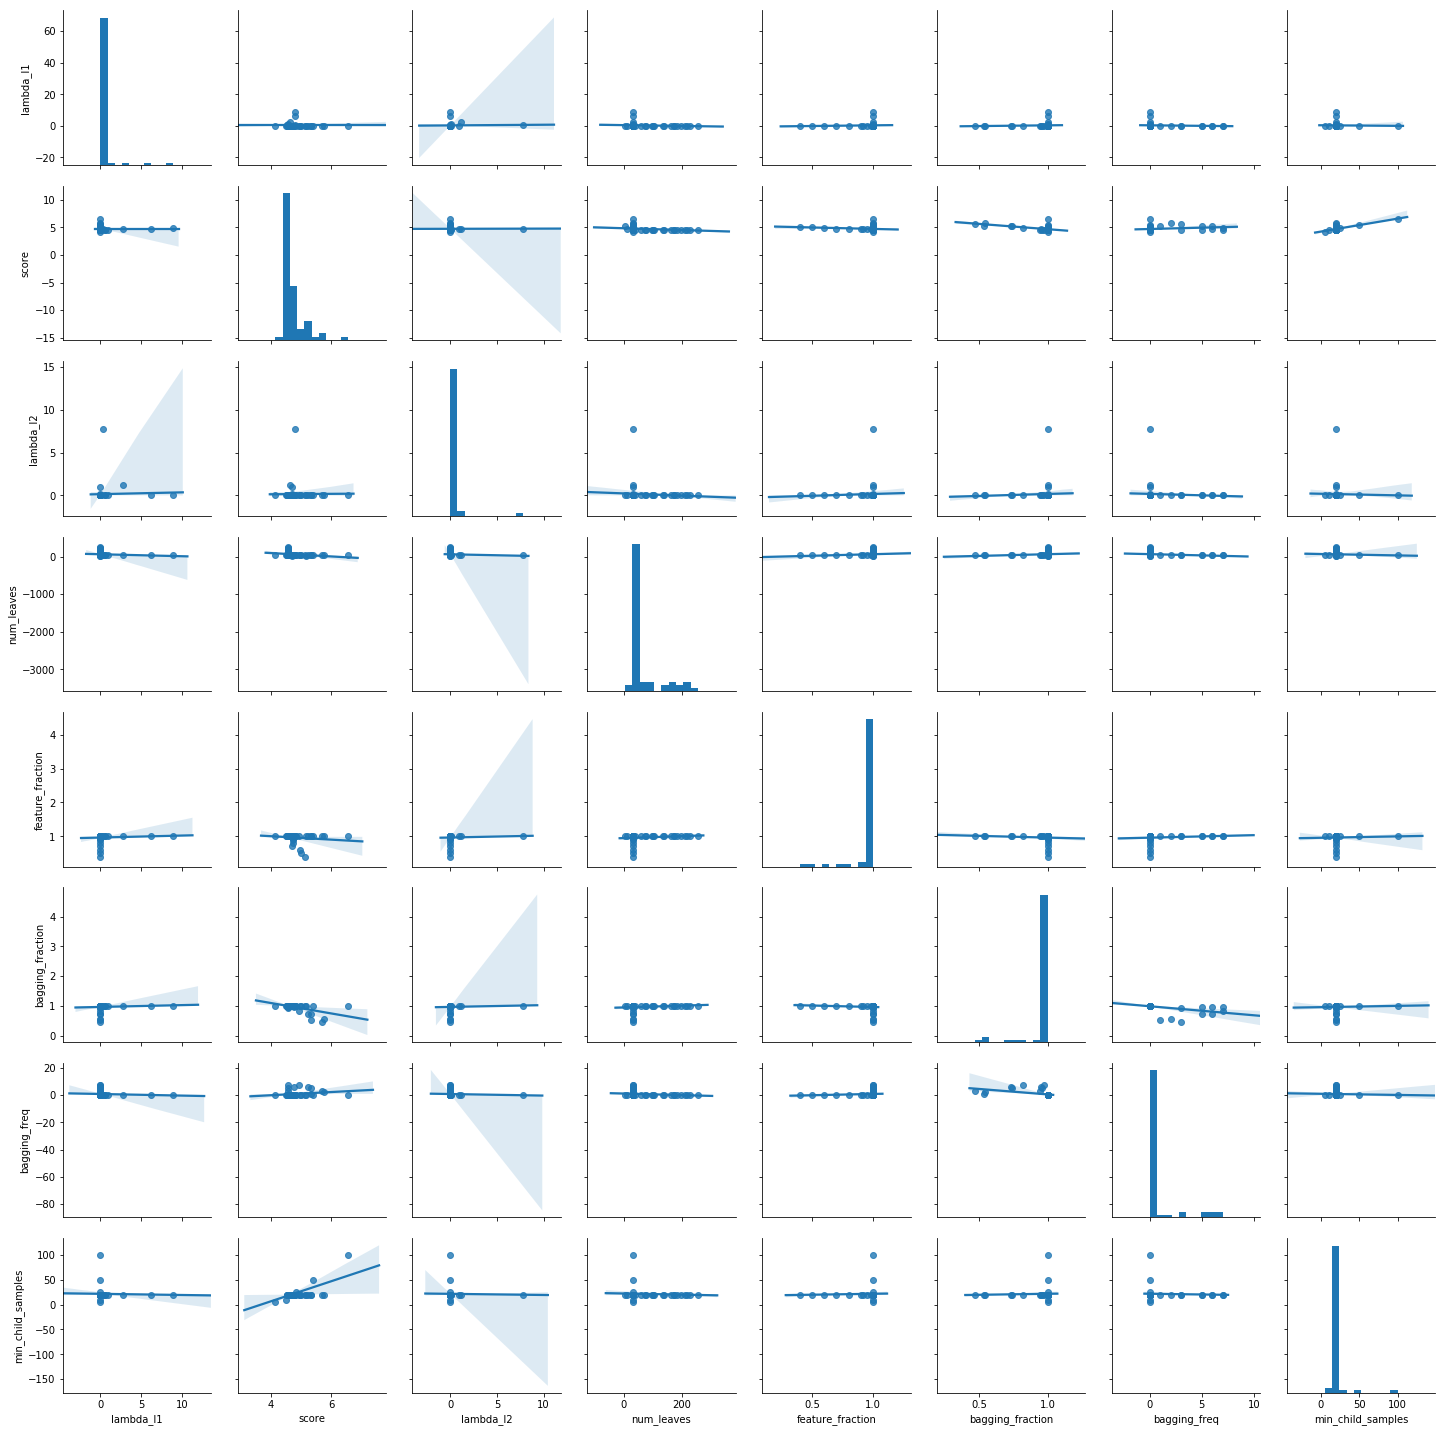

In [6]:
%matplotlib inline
import pandas as pd
import seaborn as sns

study_vals = []
for h in history:
    vals = {}
    for k, v in best_params.items():
        if k in h['value']:
            dic = eval(h['value'])
            col = k
            val = dic[k]
        else:
            col = k
            val = param_defaults[k]
        vals[col] = val
        vals['score'] = h['val_score']
    study_vals.append(vals)

study_df = pd.DataFrame(study_vals)
sns.pairplot(study_df, kind='reg')

## 見つけたパラメータでモデル作成

In [7]:
import lightgbm as lgb_original
from sklearn.metrics import r2_score

model = lgb_original.train(params, trains, num_boost_round=100, valid_sets=valids, early_stopping_rounds=5, verbose_eval=False)
predicts = model.predict(test_features)
base_r2 = r2_score(test_labels, predicts)

In [8]:
merged_params = dict(params, **best_params)
model = lgb_original.train(merged_params, trains, num_boost_round=100, valid_sets=valids, early_stopping_rounds=5, verbose_eval=False)
predicts = model.predict(test_features)
best_r2 = r2_score(test_labels, predicts)

In [9]:
print(f'Base params: {params}')
print(f'Best params: {best_params}')
print(f'Base: {base_r2}, Best: {best_r2}, Diff: {best_r2 - base_r2}')

Base params: {'objective': 'mean_squared_error', 'metric': 'rmse'}
Best params: {'lambda_l1': 0.5180093752159527, 'lambda_l2': 0.018791253111455634, 'num_leaves': 31, 'feature_fraction': 1.0, 'bagging_fraction': 1.0, 'bagging_freq': 0, 'min_child_samples': 5}
Base: 0.8711808181814997, Best: 0.9004158293791359, Diff: 0.029235011197636163
